In [12]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



In [13]:

df = pd.read_csv('/content/student_pass_dataset.csv')



In [14]:

print("Ma'lumotlar:")
print(df.head())



Ma'lumotlar:
   StudentID  Study_Hours  Attendance_Rate Passed
0          1            2               60     No
1          2            5               85    Yes
2          3            1               50     No
3          4            4               80    Yes
4          5            6               90    Yes


In [31]:
label_encoder = LabelEncoder()
df['Passed'] = label_encoder.fit_transform(df['Passed'])


In [32]:
X = df[['Study_Hours', 'Attendance_Rate']]
y = df['Passed']

In [33]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [34]:

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [35]:

y_pred = model.predict(X_test)



In [39]:
print("\nRandom Forest - Klassifikatsiya Hisoboti:")
print(classification_report(y_test, y_pred))
print("accuracy:", accuracy_score(y_test, y_pred))



Random Forest - Klassifikatsiya Hisoboti:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

accuracy: 1.0


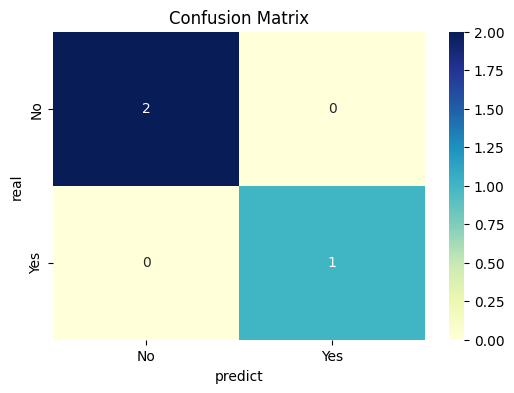

In [40]:

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Confusion Matrix")
plt.xlabel("predict")
plt.ylabel("real")
plt.show()



<ipython-input-41-1aec5f910b17>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=X.columns, y=importances, palette='mako')


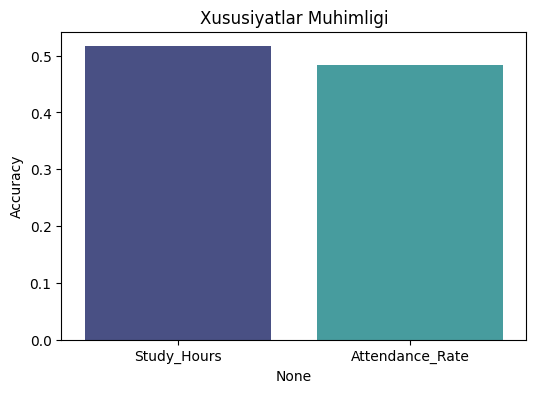

In [41]:
# 11. Muhim xususiyatlar (Feature Importance)
importances = model.feature_importances_
plt.figure(figsize=(6,4))
sns.barplot(x=X.columns, y=importances, palette='mako')
plt.title("Xususiyatlar Muhimligi")
plt.ylabel("Accuracy")
plt.show()
